In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../")

from utils_added import EvalData

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Extracting Test Data

In [2]:
# pre-trained model
# model_file_name = "./logs/model_trained_on_ModelNet40_model_best.pth"

In [3]:
labels = ["modelnet test (lk)", "modelnet train (lk)", 
          "shapenet all (c3po)", "shapenet chair (c3po)", 
          "shapenet-easy all (new)", "shapenet-easy chair (new)"]

files = []
# evaluated on: modelnet test dataset
files.append("../runs/Nov27_12-16-41_spark-agent/eval_data.pkl")

# evaluated on: modenet train dataset 
files.append("../runs/Nov27_12-46-27_spark-agent/eval_data.pkl")

# evaluated on: shapenet full point cloud, all objects, dataset.  
files.append("../runs/Nov27_12-46-54_spark-agent/eval_data.pkl")

# evaluated on: shapenet full point cloud, chair, dataset.
files.append("../runs/Nov27_14-11-44_spark-agent/eval_data.pkl")

# evaluated on: shapenet (easy) full point cloud, all objects, dataset.
files.append("../runs/Nov27_14-13-16_spark-agent/eval_data.pkl")

# evaluated on: shapenet (easy) full point cloud, chair, dataset.
files.append("../runs/Nov27_14-14-27_spark-agent/eval_data.pkl")

In [4]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData()
    eval_data.init()
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  modelnet test (lk)
loading file:  ../runs/Nov27_12-16-41_spark-agent/eval_data.pkl
label:  modelnet train (lk)
loading file:  ../runs/Nov27_12-46-27_spark-agent/eval_data.pkl
label:  shapenet all (c3po)
loading file:  ../runs/Nov27_12-46-54_spark-agent/eval_data.pkl
label:  shapenet chair (c3po)
loading file:  ../runs/Nov27_14-11-44_spark-agent/eval_data.pkl
label:  shapenet-easy all (new)
loading file:  ../runs/Nov27_14-13-16_spark-agent/eval_data.pkl
label:  shapenet-easy chair (new)
loading file:  ../runs/Nov27_14-14-27_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [5]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet test (lk),modelnet train (lk),shapenet all (c3po),shapenet chair (c3po),shapenet-easy all (new),shapenet-easy chair (new)
adds_th_score,0.949447,0.972624,0.181641,0.156250,0.992188,1.000000
adds_auc,0.952446,0.974914,0.185011,0.158416,0.995706,0.999999


## Distribution of Error Metrics

In [6]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [7]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

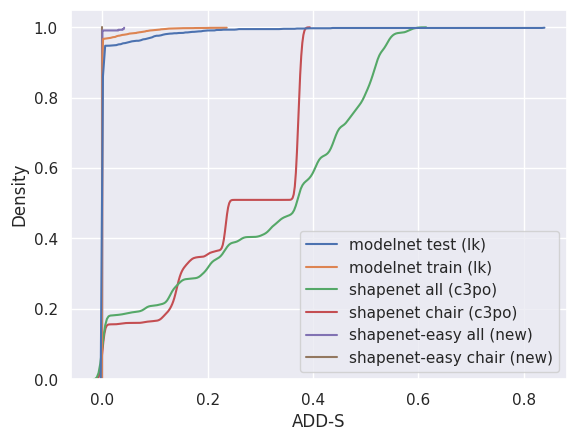

In [8]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [9]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [10]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

/tmp/ipykernel_6838/843538381.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)


Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

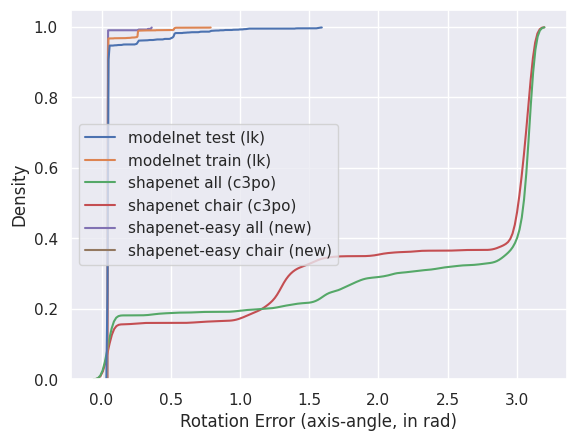

In [11]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [12]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [13]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

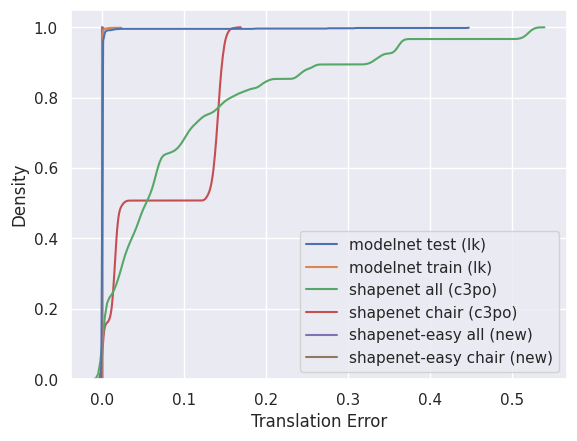

In [14]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

## Experiments on Depth Dataset

In [15]:
# pre-trained model
# model_file_name = "./logs/model_trained_on_ModelNet40_model_best.pth"

In [16]:
labels = ["modelnet test (lk)", "modelnet train (lk)", 
          "shapenet all (c3po)", 
          "shapenet depth all (c3po)", 
          "shapenet depth chair (c3po)",
          "shapenet-easy depth all (new)", 
          "shapenet-easy depth chair (new)", 
          #"shapenet-easiest depth all (new)", 
          "shapenet-easiest depth chair (new)"]

files = []
# evaluated on: modelnet test dataset
files.append("../runs/Nov27_12-16-41_spark-agent/eval_data.pkl")

# evaluated on: modenet train dataset 
files.append("../runs/Nov27_12-46-27_spark-agent/eval_data.pkl")

# evaluated on: shapenet full point cloud, all objects, dataset.  
files.append("../runs/Nov27_12-46-54_spark-agent/eval_data.pkl")



# c3po depth pc dataset 
# evaluated on: shapenet depth point cloud, all objects, dataset.
files.append("../runs/Nov27_16-10-46_spark-agent/eval_data.pkl")

# evaluated on: shapenet depth point cloud, chair, dataset.
files.append("../runs/Nov27_16-11-13_spark-agent/eval_data.pkl")



# easy
# c3po depth pc dataset, but with lk's error distribution (easy)
# evaluated on: shapenet-easy depth point cloud, all objects, dataset.
files.append("../runs/Nov27_18-38-31_spark-agent/eval_data.pkl")

# evaluated on: shapenet-easy depth point cloud, chair, dataset.
files.append("../runs/Nov27_18-40-23_spark-agent/eval_data.pkl")



# easiest 
# evaluated on: shapenet-easiest depth point cloud, all objects, dataset.
# files.append("../runs/Nov27_19-06-49_spark-agent/eval_data.pkl")

# evaluated on: shapenet-easiest depth point cloud, chair, dataset.
files.append("../runs/Nov27_16-19-14_spark-agent/eval_data.pkl")

In [17]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData()
    eval_data.init()
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  modelnet test (lk)
loading file:  ../runs/Nov27_12-16-41_spark-agent/eval_data.pkl
label:  modelnet train (lk)
loading file:  ../runs/Nov27_12-46-27_spark-agent/eval_data.pkl
label:  shapenet all (c3po)
loading file:  ../runs/Nov27_12-46-54_spark-agent/eval_data.pkl
label:  shapenet depth all (c3po)
loading file:  ../runs/Nov27_16-10-46_spark-agent/eval_data.pkl
label:  shapenet depth chair (c3po)
loading file:  ../runs/Nov27_16-11-13_spark-agent/eval_data.pkl
label:  shapenet-easy depth all (new)
loading file:  ../runs/Nov27_18-38-31_spark-agent/eval_data.pkl
label:  shapenet-easy depth chair (new)
loading file:  ../runs/Nov27_18-40-23_spark-agent/eval_data.pkl
label:  shapenet-easiest depth chair (new)
loading file:  ../runs/Nov27_16-19-14_spark-agent/eval_data.pkl


#### ADD-S and ADD-S AUC Metrics

In [18]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet test (lk),modelnet train (lk),shapenet all (c3po),shapenet depth all (c3po),shapenet depth chair (c3po),shapenet-easy depth all (new),shapenet-easy depth chair (new),shapenet-easiest depth chair (new)
adds_th_score,0.949447,0.972624,0.181641,0.097656,0.056641,0.343750,0.363281,1.000000
adds_auc,0.952446,0.974914,0.185011,0.115548,0.080108,0.345262,0.404542,0.999999


#### Distribution of Error Metrics

In [19]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [20]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

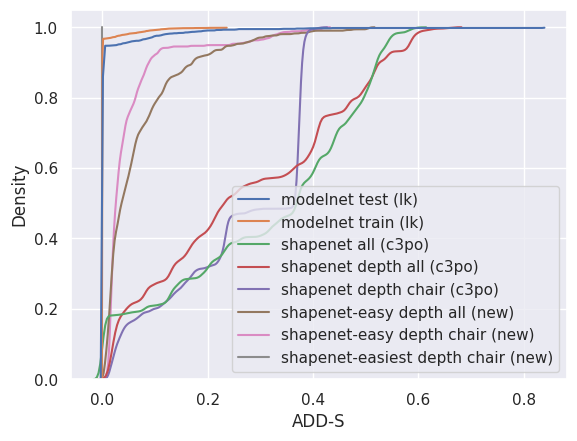

In [21]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [22]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [23]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

/tmp/ipykernel_6838/843538381.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)


Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

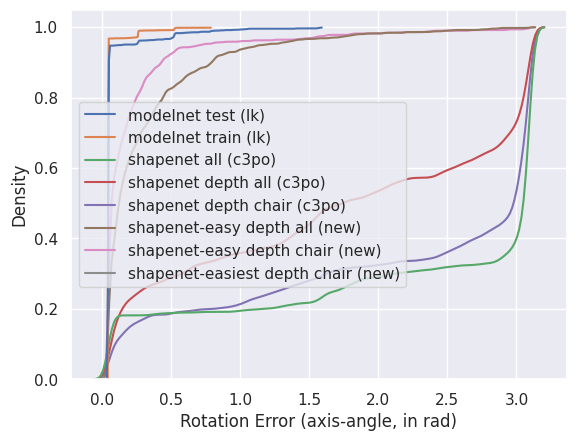

In [24]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [25]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [26]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

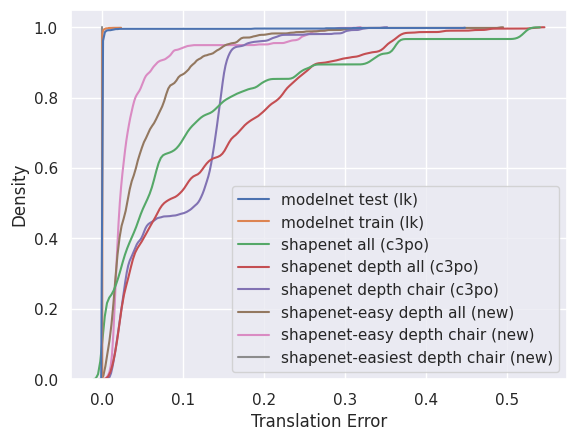

In [27]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')